#1. Data Source and Contents

In [99]:
#The first step is to import the necessary packages.

import pandas as pd
import numpy as np

#Scikit-learn allows for label encoding.
from sklearn.preprocessing import LabelEncoder

#Scikit-learn allows us to create decision trees.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

#The below scikit-learn packages allow us to analyze the performance of said decision trees.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

#Packages for data visualization.
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Q.1 - Why does it makes sense to discretize columns for this problem?

Discretizating columns makes sense for this problem, because binning the columns makes the data much more organized and easier to interpret for data visualization. Discretization also helps us notice "bad" data easily, whether they are null values, outliers, or anything that wouldn't reasonably fit into a bin.

Q.2 - What might be the issues (if any) if we DID NOT discretize the columns?

Without discretizing columns, we run the risk of overfitting which means the decision tree data will be skewed. Furthermore, it will be difficult to visualize the data without discretization. Five bins means five bar charts, which is so much easier to interpret than having hundreds or even thousands of bar charts so tightly packed next to each other. Finally, there is the concern of time and resources. The computational power required when omitting discretization is monumental. Data can take forever to load and can also be costly to companies when these problems can be easily avoided with discretization.

#2. Data Quality Analysis

In [ ]:
#Selecting the data file and reading it into a dataframe
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [ ]:
#Testing the waters with some initial samples.
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
#Checking how many rows and columns exist in the data file.
census.shape

(48842, 11)

In [ ]:
#Determining number of missing values. Luckily there are none which means we don't have to drop any columns or fill any values.
census.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [ ]:
#Descriptive statistics of each column
census.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


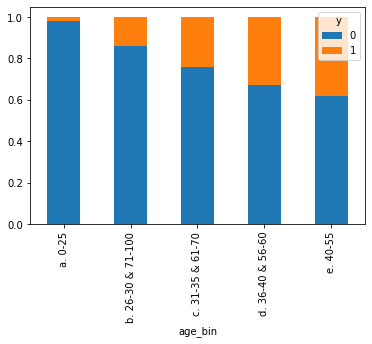

In [ ]:
#Visualizing the age groups from spring chickens to... winter chickens
pd.crosstab(census['age_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

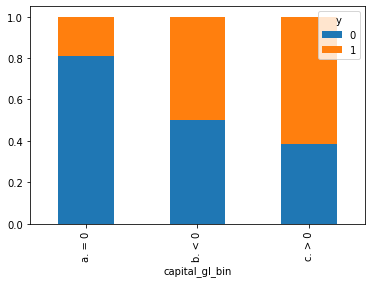

In [ ]:
#Visualizing the capital groups
pd.crosstab(census['capital_gl_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

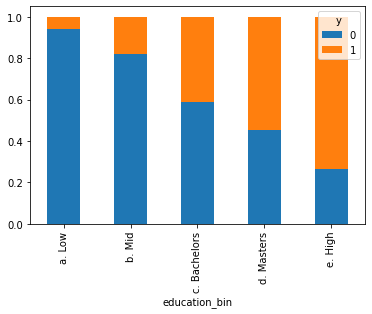

In [ ]:
#Visualizing the education groups from high school dropouts to MSBA students
pd.crosstab(census['education_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

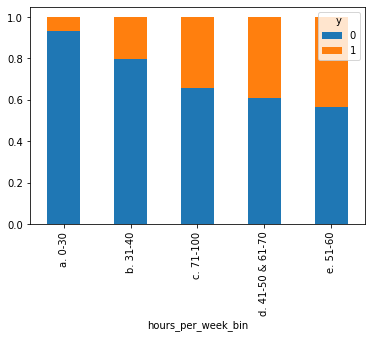

In [ ]:
#Visualizing the hours per week groups from part timers to workaholics
pd.crosstab(census['hours_per_week_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

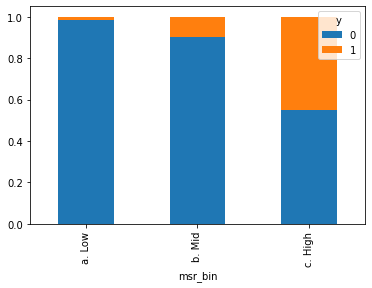

In [ ]:
#Visualizing marital status
pd.crosstab(census['msr_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

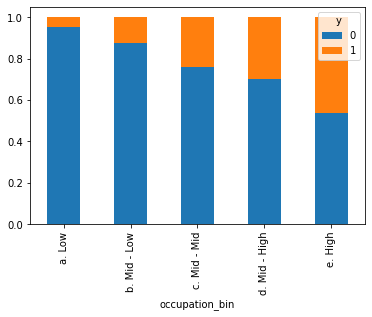

In [ ]:
#Visualizing occupations
pd.crosstab(census['occupation_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

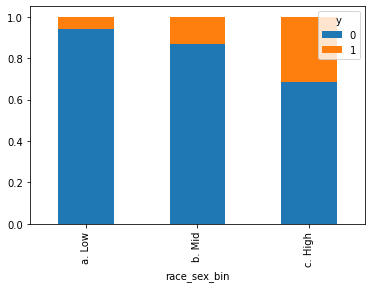

In [ ]:
#Visualizing race and sex
pd.crosstab(census['race_sex_bin'],census['y'],normalize='index').plot(kind='bar',stacked=True)
plt.show()

In [ ]:
#Separating data into test and training dataframes before creating the model

train=census[census['flag']=='train']
train
test=census[census['flag']=='test']
test

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1
32564,b. 31-40,b. Mid - Low,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,test,1
32565,a. 0-30,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,a. 0-25,test,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


#3. Build Decision Tree Classifier Models

In [ ]:
#Creating dummy variables for every bin to for the decision tree
x_train = pd.get_dummies(train[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train['y']
x_test=pd.get_dummies(test[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test['y']

In [ ]:
#Building the decision tree
dtree=DecisionTreeClassifier(max_depth=10,random_state=101, max_features=None, min_samples_leaf=15)
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

#4. Evaluate Decision Tree Performance

In [ ]:
#Confusion Matrix
confusionmatrix=confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[11521   914]
 [ 1653  2193]]


In [ ]:
#Accuracy Score
accuracy= metrics.accuracy_score(y_test, y_pred)
print('Accuracy:',round(accuracy, 2))

Accuracy: 0.84


In [ ]:
#Recall
recall=recall_score(y_test, y_pred)
print('Recall:', round(recall, 2))

Recall: 0.57


In [ ]:
#Precision
precision= precision_score(y_test, y_pred)
print('Precision:', round(precision, 2))

Precision: 0.71


In [ ]:
#F1
f1=f1_score(y_test, y_pred)
print('F1 Score:', round(f1, 2))

F1 Score: 0.63


In [ ]:
#AUC Value
auc=roc_auc_score(y_test, y_pred)
print('AUC:', round(auc, 5))

AUC: 0.74835


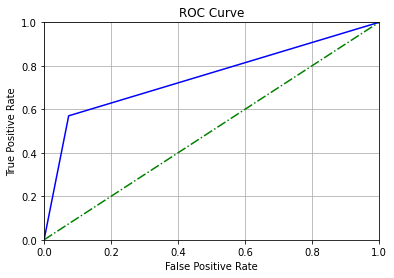

In [ ]:
#ROC Curve shows us the TPR (True Positive Rate) vs the FPR(False Positive Rate) 
FPR, TPR, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure()
plt.plot(FPR, TPR, color='blue')
plt.plot([0, 1], [0, 1], color='green', linestyle='-.')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

#5. Tune Decision Tree Performance

In [ ]:
#Checking the accuracy of the criteria option model, where we need to decide between entropy and gini (the default)
results = []
criterion_options = ['entropy', 'gini']
for criterion in criterion_options:
    model = DecisionTreeClassifier(criterion=criterion,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(f"Accuracy: {criterion}: {rounded_accuracy}")
print(results)

['Accuracy: entropy: 0.835944', 'Accuracy: gini: 0.835882']


In [ ]:
#Checking the accuracy of each maximum feature option model 
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.836312, 0.836742, 0.8349, 0.836558, 0.836497, 0.835391]


max_features: 0.3, accuracy: 0.836312
max_features: 0.4, accuracy: 0.836742
max_features: 0.5, accuracy: 0.8349
max_features: 0.6, accuracy: 0.836558
max_features: 0.7, accuracy: 0.836497
max_features: 0.8, accuracy: 0.835391


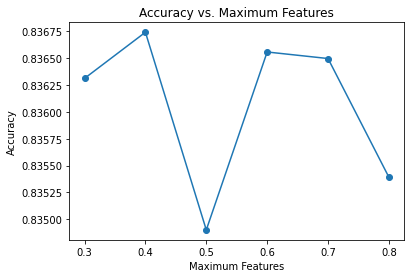

In [ ]:
#Checking hyperparameters value accuracy score for each model
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
    print("max_features: {}, accuracy: {}".format(max_features, rounded_accuracy))

#Creating a line graph to visualize the accuracy results
plt.plot(max_features_options, results, marker='o')
plt.title("Accuracy vs. Maximum Features")
plt.xlabel("Maximum Features")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Checking the accuracy of each minimum sample leaf option model 
results = []
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_features=0.7,
                                   random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.8385, 0.841, 0.8416, 0.8402, 0.8385, 0.8388, 0.8358, 0.8386]


min_samples_leaf: 5, accuracy: 0.8385
min_samples_leaf: 10, accuracy: 0.841
min_samples_leaf: 15, accuracy: 0.8416
min_samples_leaf: 20, accuracy: 0.8402
min_samples_leaf: 25, accuracy: 0.8385
min_samples_leaf: 30, accuracy: 0.8388
min_samples_leaf: 35, accuracy: 0.8358
min_samples_leaf: 40, accuracy: 0.8386


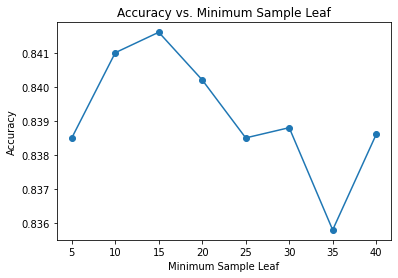

In [ ]:
#Checking each hyperparameter value and accuracy score for each model
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_features=0.7,
                                   random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
    print("min_samples_leaf: {}, accuracy: {}".format(min_samples_leaf, rounded_accuracy))

#Creating a line graph to visualize the accuracy results
plt.plot(min_samples_leaf_options, results, marker='o')
plt.title("Accuracy vs. Minimum Sample Leaf")
plt.xlabel("Minimum Sample Leaf")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Checking the accuracy of each maximum depth option model
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'gini'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for max_depth in max_depth_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20,
                                   max_depth=max_depth, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.816596, 0.831091, 0.832381, 0.837234, 0.840366, 0.840243, 0.840857, 0.839445, 0.84098, 0.841717]


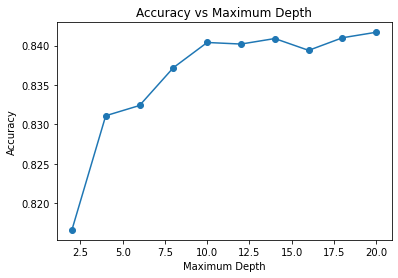

In [ ]:
#Checking each hyperparameter value and accuracy score for each model
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'gini'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for max_depth in max_depth_options:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, max_features=max_features,
                                   min_samples_leaf=min_samples_leaf, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)

#Creating a line graph to visualize the accuracy results
plt.plot(max_depth_options, results, marker='o')
plt.title('Accuracy vs Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

Q3 - Decision Tree Hyper-parameter variation vs. performance

In [ ]:
#Checking the performance of the first decision tree using two different criterion entropy and gini (default) 
criterion_options = ['entropy', 'gini']
results = []
for criterion in criterion_options:
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Criterion": criterion, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Criterion", inplace=True)
results_df

,Accuracy,Precision,Recall,F1-Score
Criterion,,,,
entropy,0.835944,0.780032,0.73896,0.755467
gini,0.835882,0.779849,0.73910,0.755504


In [ ]:
#Checking the performance of the 2nd decision tree using gini as the criterion and different max feature hyperparameter options 
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Accuracy": report["accuracy"], "Recall": report["macro avg"]["recall"], "Precision": report["macro avg"]["precision"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results, index=max_features_options)
results_df.index.name = 'Maximum Features'
results_df

,Accuracy,Recall,Precision,F1-Score
Maximum Features,,,,
0.3,0.836312,0.739022,0.780799,0.755760
0.4,0.836742,0.739304,0.781620,0.756222
0.5,0.834900,0.737648,0.778288,0.753989
0.6,0.836558,0.739901,0.780995,0.756434
0.7,0.836497,0.739681,0.780946,0.756266
0.8,0.835391,0.738688,0.778955,0.754926


In [ ]:
#Checking the performance of the 3rd decision tree using gini as the criterion with the max feature option with the highest accuracy score, and minimium sample leaf hyperparameter options

min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
max_features = 0.7
for min_samples_leaf in min_samples_leaf_options:
    dtree = DecisionTreeClassifier(criterion='gini', max_features=max_features, min_samples_leaf=min_samples_leaf,
                                   random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Minimum Sample Leaf": min_samples_leaf, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Minimum Sample Leaf", inplace=True)
results_df

,Accuracy,Precision,Recall,F1-Score
Minimum Sample Leaf,,,,
5,0.838523,0.785095,0.740380,0.758090
10,0.841042,0.788900,0.744632,0.762291
15,0.841594,0.789132,0.746970,0.763989
20,0.840182,0.788803,0.740478,0.759319
25,0.838523,0.787094,0.735890,0.755481
30,0.838769,0.786076,0.739373,0.757685
35,0.835821,0.782258,0.732774,0.751765
40,0.838585,0.787650,0.735032,0.755016


In [ ]:
#Checking the performance of the 4th decision tree using gini as the criteria,maximum feature option with the highest accuracy score, minimum sample leaf with the highest accuracy score, and maximum depth hyperparameter options

max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
results = []
for max_depth in max_depth_options:
    dtree = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20,
                                   max_depth=max_depth, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({'Accuracy': report['accuracy'], 
                    'Recall': report['1']['recall'], 
                    'Precision': report['1']['precision'], 
                    'F1 Score': report['1']['f1-score']})
results_df = pd.DataFrame(results, index=max_depth_options)
results_df.index.name = 'Maximum Depth'
results_df

,Accuracy,Recall,Precision,F1 Score
Maximum Depth,,,,
2,0.816596,0.397816,0.695455,0.506120
4,0.831091,0.572803,0.665559,0.615707
6,0.832381,0.495580,0.707236,0.582786
8,0.837234,0.542382,0.700941,0.611551
10,0.840366,0.542122,0.713308,0.616044
12,0.840243,0.566823,0.699839,0.626347
14,0.840857,0.557982,0.706618,0.623565
16,0.839445,0.548362,0.706296,0.617389
18,0.840980,0.560062,0.705998,0.624619


#6. Visualize The Best Decision Tree

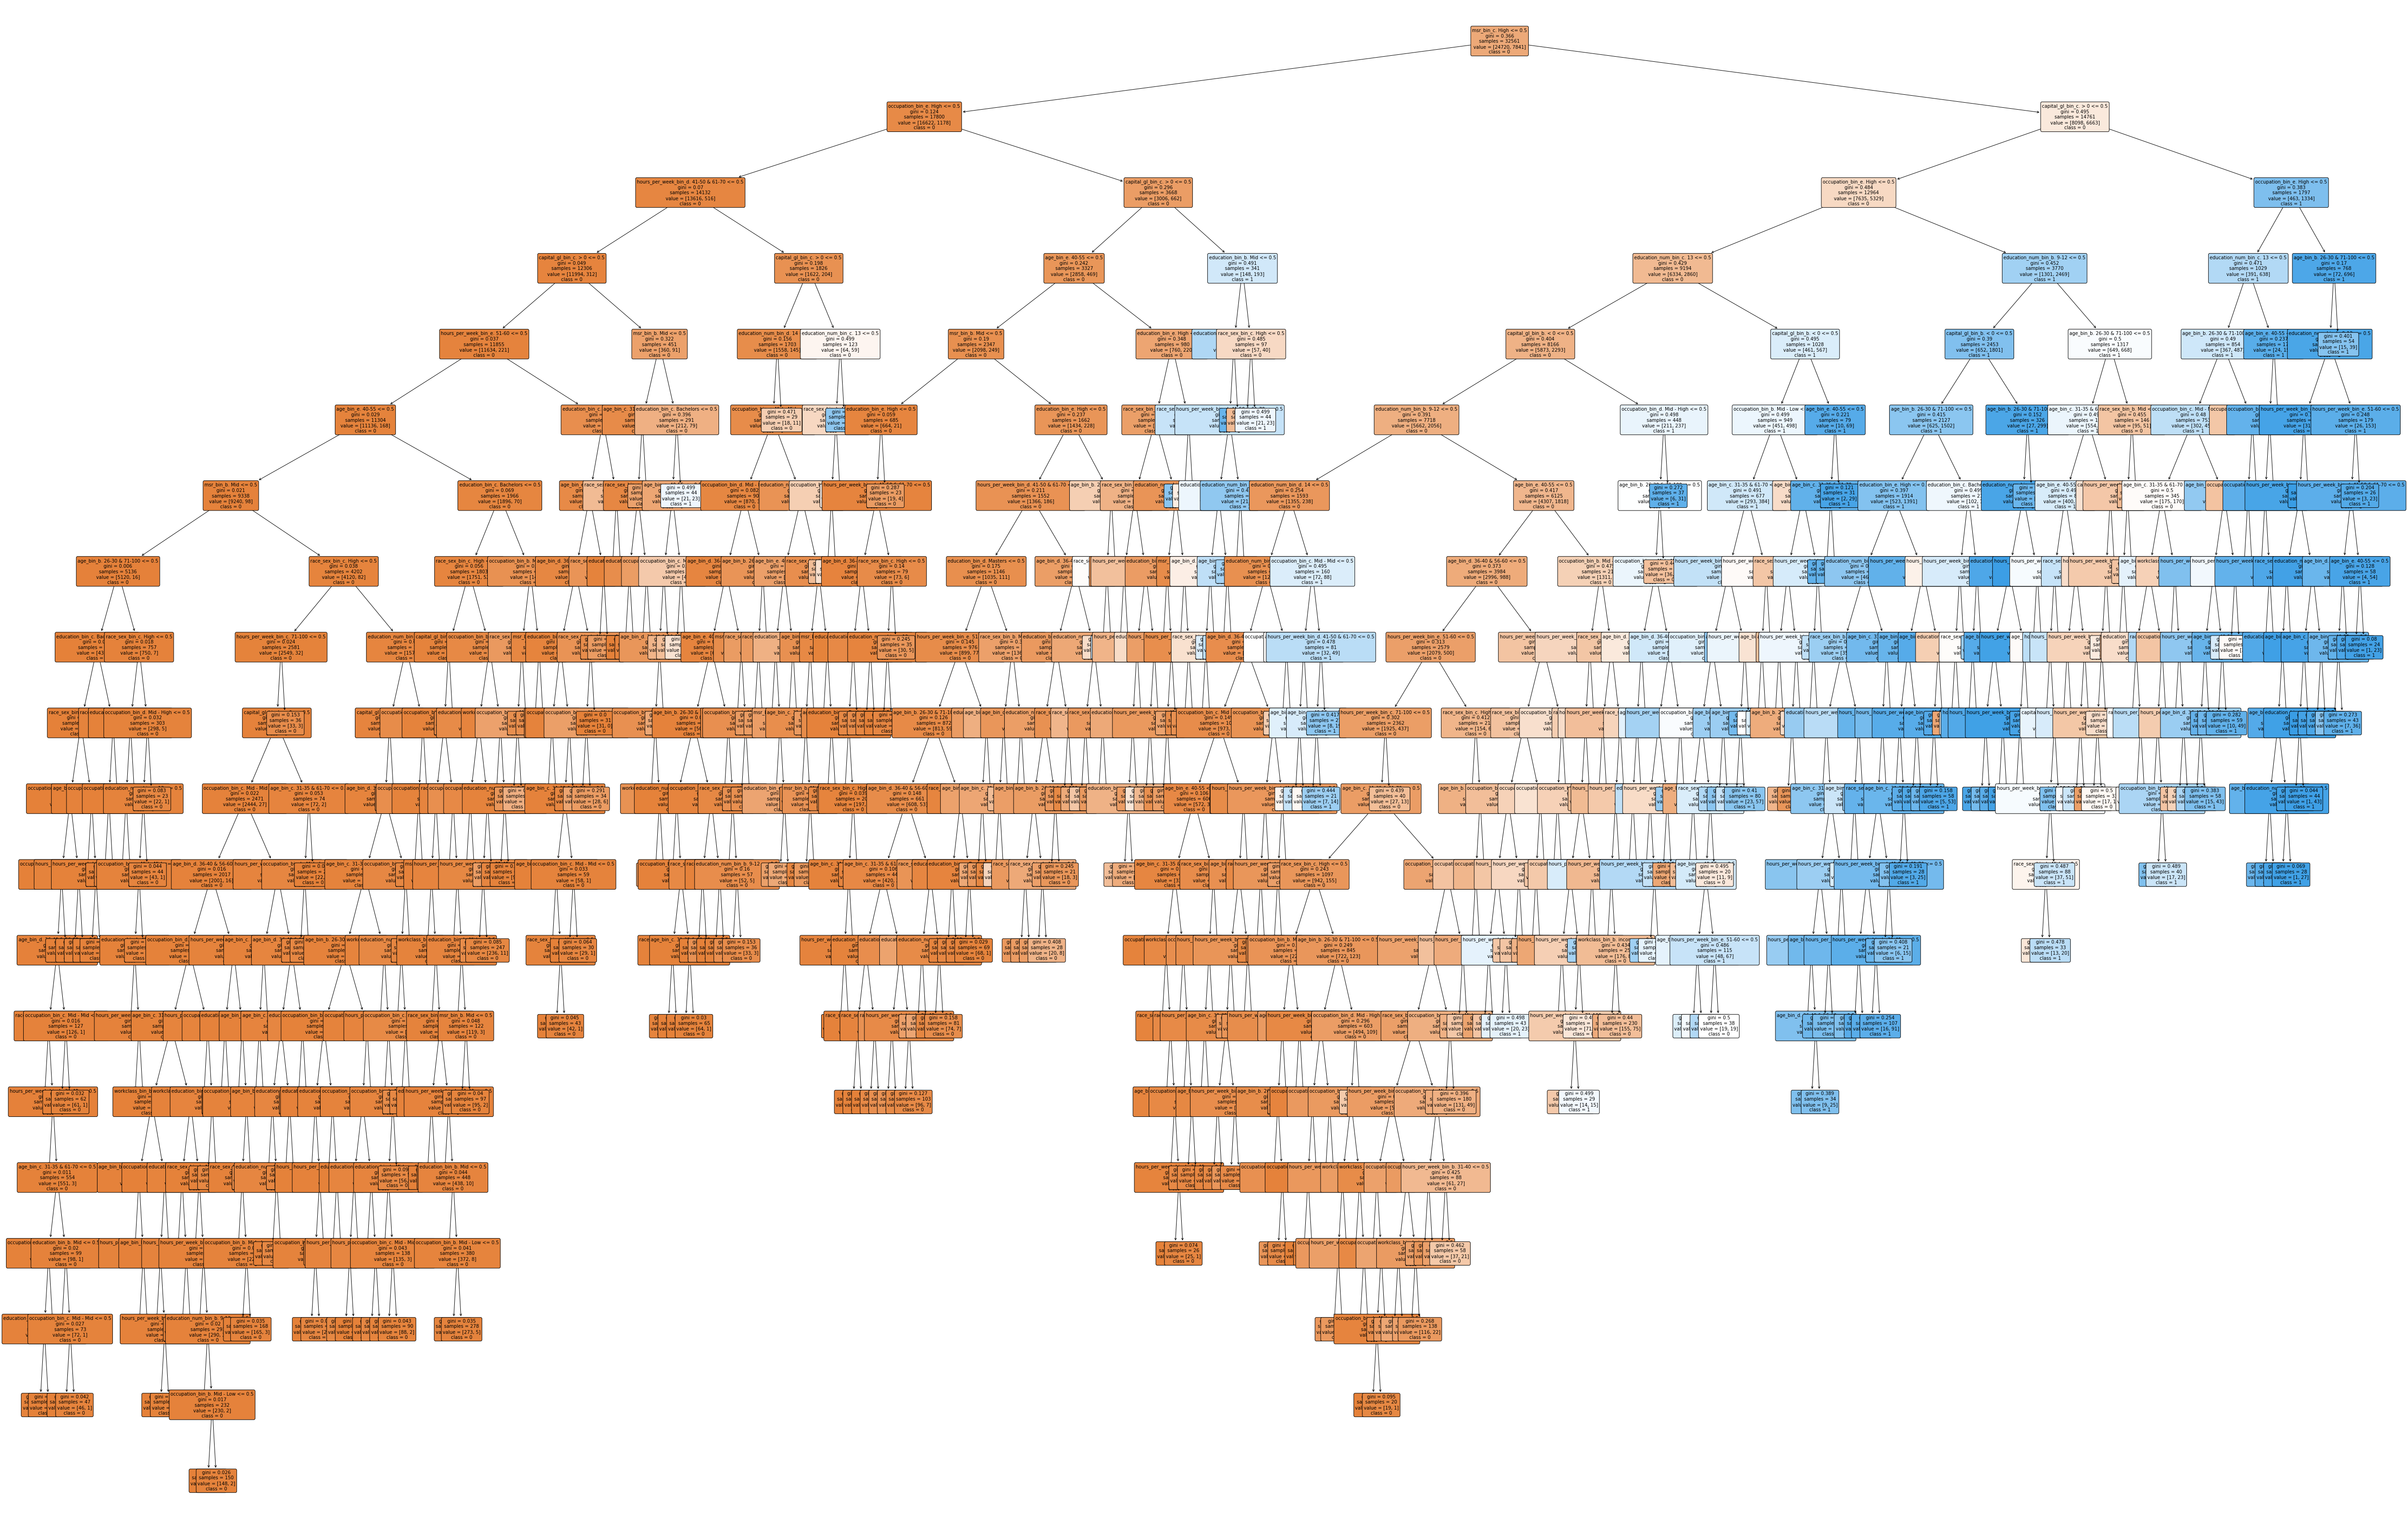

In [100]:
#Visualizing the best decision tree of those we created
top_tree = DecisionTreeClassifier(criterion='gini', max_features=0.5, min_samples_leaf=20,
                                    max_depth=20, random_state=101)
top_tree.fit(x_train, y_train)
plt.figure(figsize=(90, 60))
a = plot_tree(top_tree, feature_names=list(x_train), class_names=["0", "1"],
              filled=True, rounded=True, fontsize=10)
plt.show()

#7. Conclusion

Q4 - How long was your total run time to train the best model?

In [101]:
%%time

top_tree = DecisionTreeClassifier(criterion='gini', max_features=0.5, min_samples_leaf=20,
                                    max_depth=20, random_state=101)
top_tree.fit(x_train, y_train)
y_pred=top_tree.predict(x_test)

CPU times: user 64.9 ms, sys: 1.79 ms, total: 66.7 ms
Wall time: 75.2 ms


Q5 - Did you find the BEST TREE?

I believe I did, as the accuracy and precision were quite good, but only out of what I was able to test. A decision tree expert would be able to tweak the hyperparameters and such to a more optimal level to find what may be the true best tree. I do believe I was still able to find the best tree out of what I tested though.

Q6 - Write your observations from the visualization of the best tree.

The best tree is very complicated to visualize unfortunately, with several nodes and leaves. The words inside are also way too small to read. This in tandem with the overlapping text makes it unreadable. Unfortunately, the sheer amount of data ended up being too overwhelming to provide a reliable data visualization.

Q7 - Will this Tree “overfit”?

Overfitting is always a possibility, so it is certainly possible that the top tree may overfit. Given that the accuracy in this tree is on the higher end, overfitting is more likely than unlikely.

#8. Prediction Using The “Trained” Decision Tree Model

In [111]:
#Adding a new individual for prediction with the decision tree model, with the invidual's information being applicable to the bins previously created.
new=pd.DataFrame({'age_bin_b. 26-30 & 71-100':0,'age_bin_c. 31-35 & 61-70':0,'age_bin_d. 36-40 & 56-60':1,'age_bin_e. 40-55':0,'capital_gl_bin_b. < 0':0,'capital_gl_bin_c. > 0':1,'education_bin_b. Mid':0,'education_bin_c. Bachelors':0,'education_bin_d. Masters':0,'education_bin_e. High':1,'hours_per_week_bin_b. 31-40':0,'hours_per_week_bin_c. 71-100':0,'hours_per_week_bin_d. 41-50 & 61-70':1,'hours_per_week_bin_e. 51-60':0,'msr_bin_b. Mid':0,'msr_bin_c. High':1,'occupation_bin_b. Mid - Low':1,'occupation_bin_c. Mid - Mid':0,'occupation_bin_d. Mid - High':0,'occupation_bin_e. High':0,'race_sex_bin_b. Mid':1,'race_sex_bin_c. High':0,'education_num_bin_b. 9-12':1,'education_num_bin_c. 13':0,'education_num_bin_d. 14':0,'education_num_bin_e. 15+':0,'workclass_bin_b. income':1},index=[0])
new

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High,education_num_bin_b. 9-12,education_num_bin_c. 13,education_num_bin_d. 14,education_num_bin_e. 15+,workclass_bin_b. income
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [113]:
#After the addition of the new individual's dataframe is completed we can utilize our program to run the Decision Tree algorithm.  
dtree=DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=10, min_samples_leaf=15)
dtree = dtree.fit(x_train,y_train)
y_pred=dtree.predict(df)
print(y_pred)
if y_pred == 0:
  print('The income for this type of person is equal to or under 50K.')
else:
  print('The income for this type of person is above 50K.')

[0]
The income for this type of person is equal to or under 50K.


Q.8 What is the probability that your prediction for this person is correct?

In [116]:
#Calculating the accuracy of the decision tree to see the likelihood of a correct prediction
x_prob=[[0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1]]
y_pred=dtree.predict(x_prob)
prob=dtree.predict_proba(x_prob)

print('The probability that my prediction for this person is correct is',prob[0][y_pred])

The probability that my prediction for this person is correct is [0.71428571]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
